In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

In [2]:
df= pd.read_csv("/Users/user/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#dropping the columns that are not needed for the analysis
df.drop(["customerID"], inplace=True, axis=1)   

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df["gender"]. value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df["SeniorCitizen"]. value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
for col in df.columns:
    if col not in["tenure","MonthlyCharges","TotalCharges"]:
        print   (f"{col} : {df[col].unique()}")
        print('----------------------')
        

gender : ['Female' 'Male']
----------------------
SeniorCitizen : [0 1]
----------------------
Partner : ['Yes' 'No']
----------------------
Dependents : ['No' 'Yes']
----------------------
PhoneService : ['No' 'Yes']
----------------------
MultipleLines : ['No phone service' 'No' 'Yes']
----------------------
InternetService : ['DSL' 'Fiber optic' 'No']
----------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
----------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
----------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
----------------------
TechSupport : ['No' 'Yes' 'No internet service']
----------------------
StreamingTV : ['No' 'Yes' 'No internet service']
----------------------
StreamingMovies : ['No' 'Yes' 'No internet service']
----------------------
Contract : ['Month-to-month' 'One year' 'Two year']
----------------------
PaperlessBilling : ['Yes' 'No']
----------------------
PaymentMethod : ['Electronic check' 'Mailed c

In [13]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    print(col, len(df[df[col]== " "]))
    print('----------------------')

tenure 0
----------------------
MonthlyCharges 0
----------------------
TotalCharges 11
----------------------


In [14]:
df["TotalCharges"]= df["TotalCharges"].replace({" ": "0.0"}). astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Exploratorty Data Analysis

In [17]:
df.shape

(7043, 20)

In [18]:
df.columns  

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    

    col_mean= df[column].mean()
    col_median= df[column].median() 
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")                        
    plt.axvline(col_median, color="green", linestyle="--", label="Median")
    plt.legend()    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

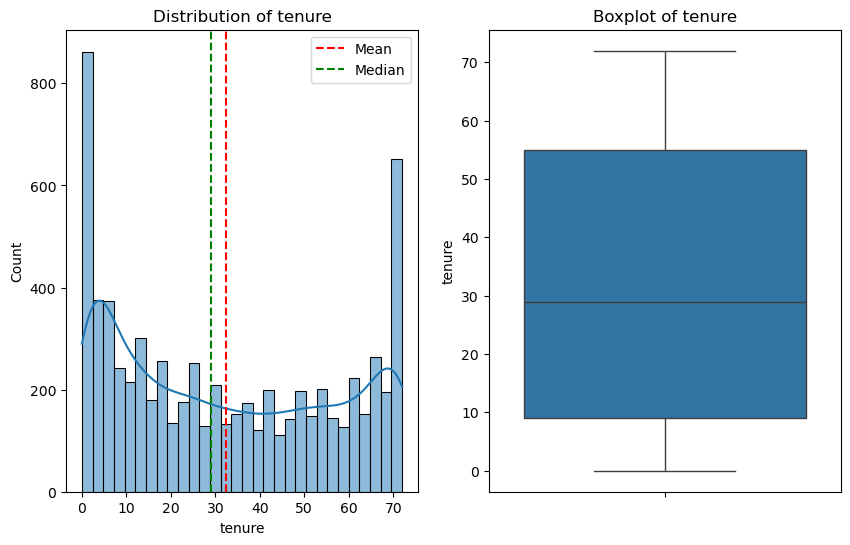

In [21]:
plot_distribution(df, "tenure")     

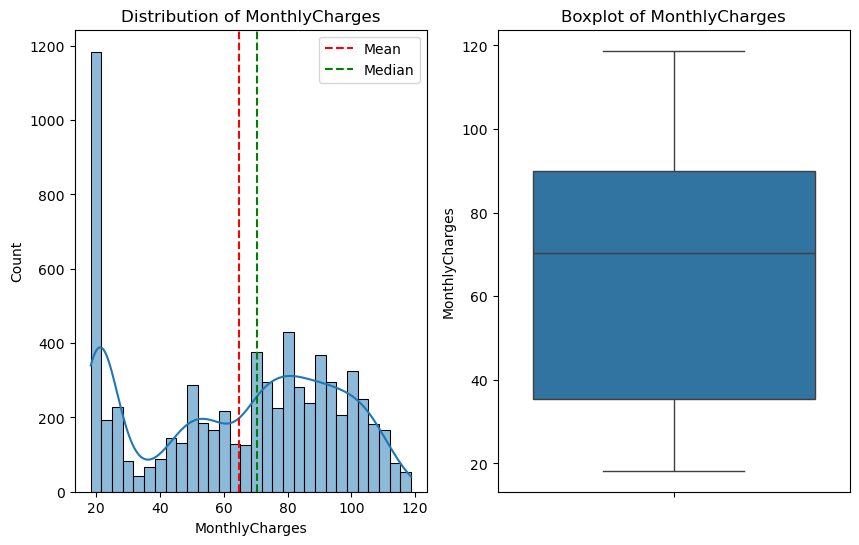

In [22]:
plot_distribution(df, "MonthlyCharges")

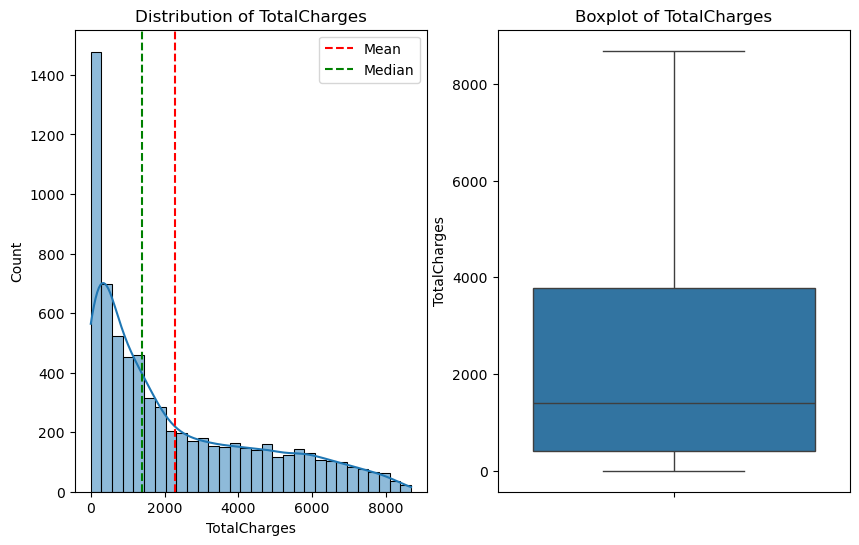

In [23]:
plot_distribution(df, "TotalCharges")

<function matplotlib.pyplot.show(close=None, block=None)>

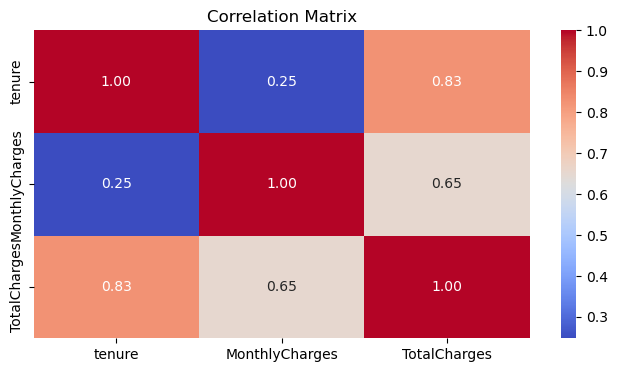

In [24]:
plt.figure(figsize= (8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot= True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show


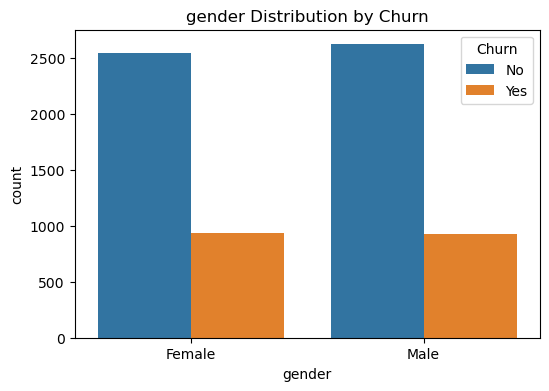

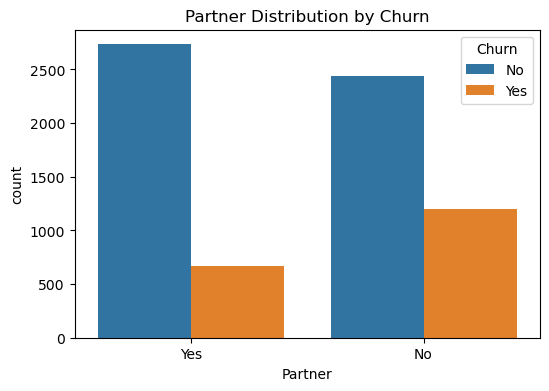

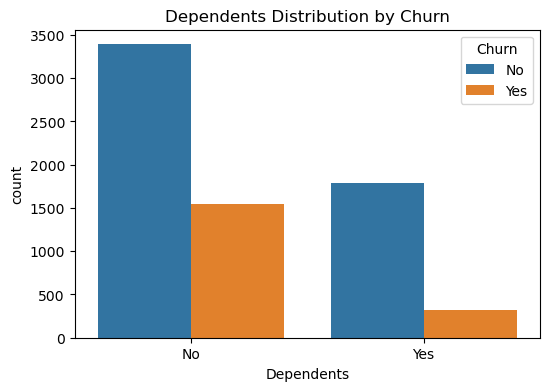

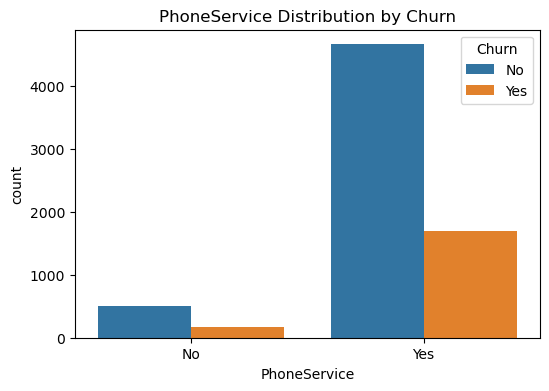

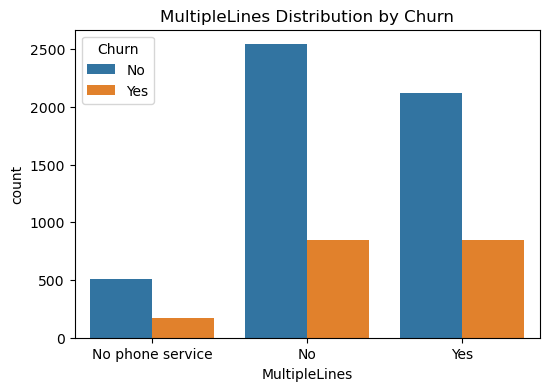

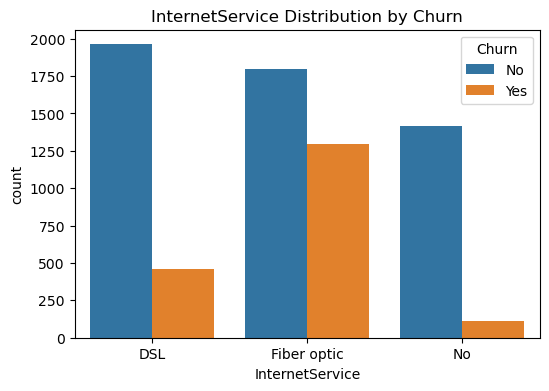

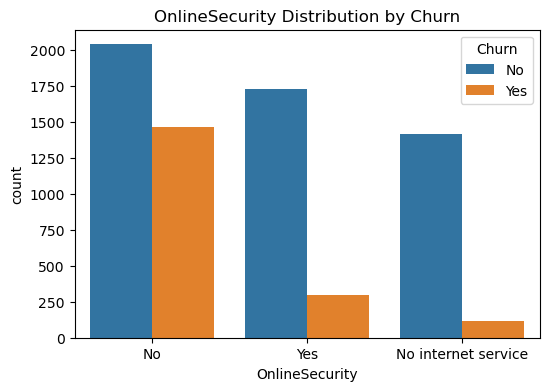

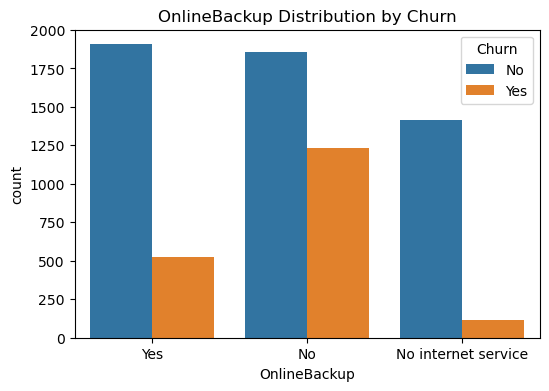

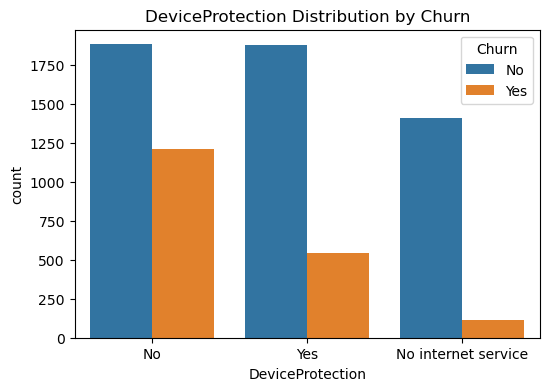

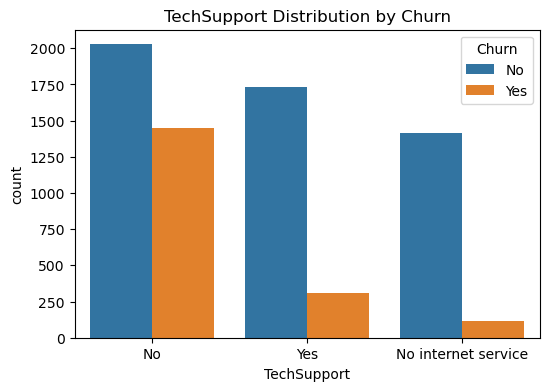

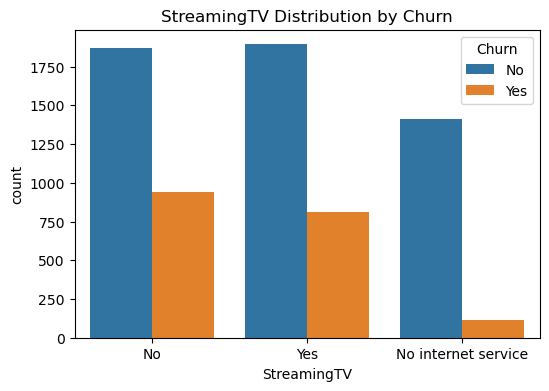

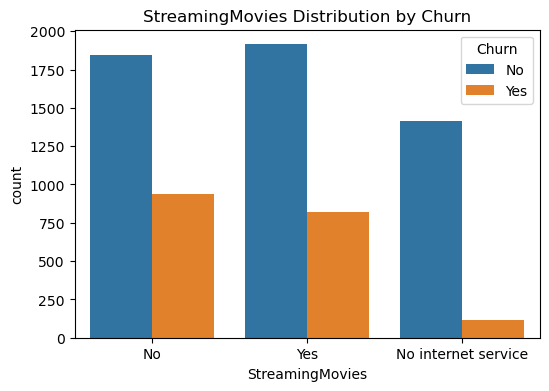

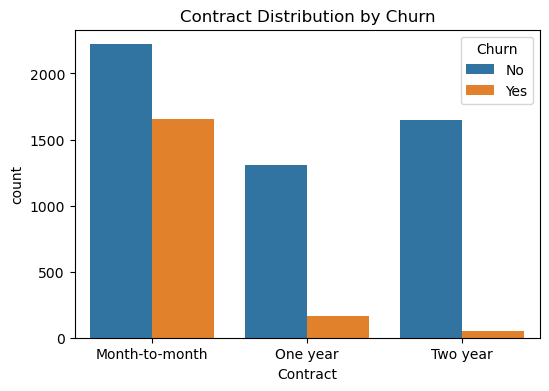

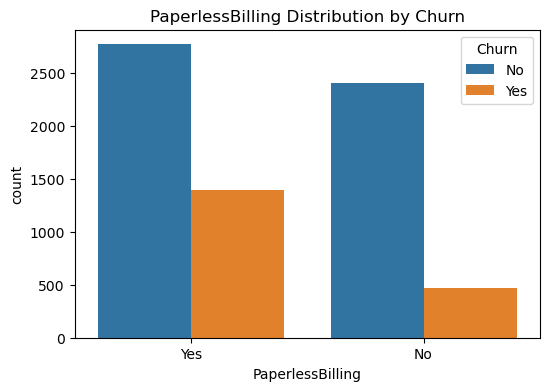

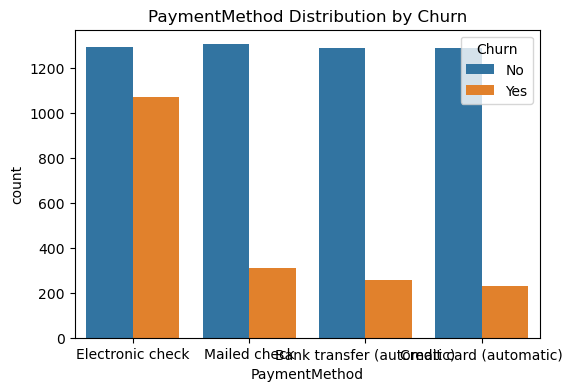

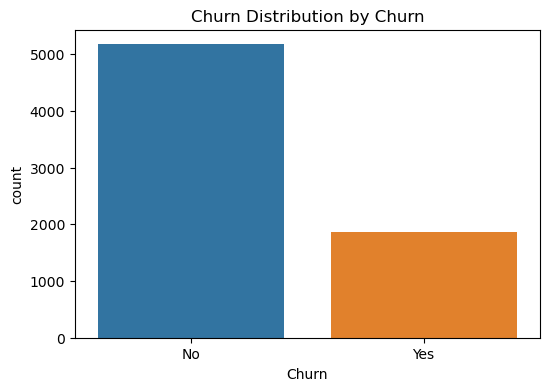

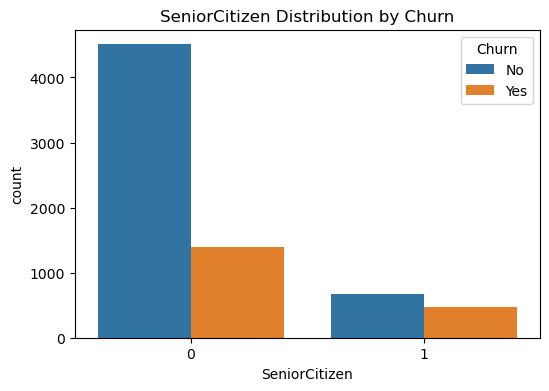

In [25]:
categorical_cols= df.select_dtypes(include="object").columns.to_list()+["SeniorCitizen"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data= df,x=col, hue="Churn")
    plt.title(f"{col} Distribution by Churn")
    plt.show()

In [26]:
#Label Encoding
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/var/folders/x2/yg561d1j0gjg9066qpqb4cnh0000gn/T/ipykernel_72391/4041749032.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


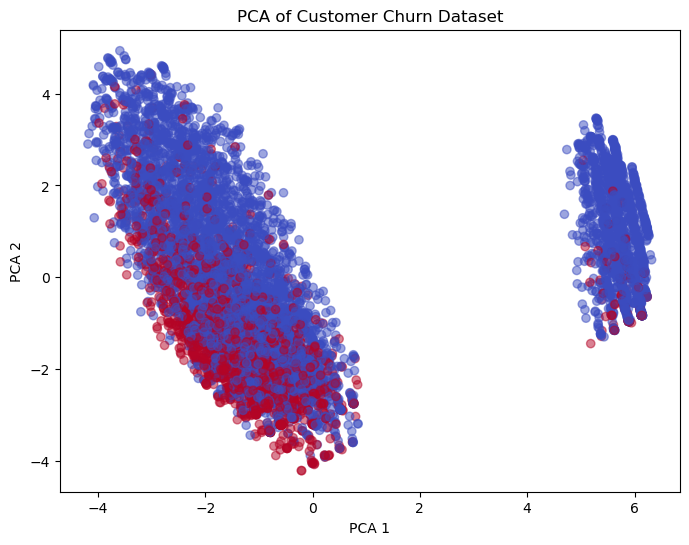

Processed data saved to 'processed_telco_churn.csv'.


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
X = df_encoded.drop("Churn", axis=1)  # "Churn" is the target column
y = df_encoded["Churn"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA result (optional visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Customer Churn Dataset')
plt.show()
# Save the processed DataFrame to a new CSV file
df_encoded.to_csv("/Users/user/Downloads/processed_telco_churn.csv", index=False)
print("Processed data saved to 'processed_telco_churn.csv'.")               

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)


RandomForestClassifier(random_state=42)

In [31]:
model_orig = RandomForestClassifier(random_state=42)
model_orig.fit(X, y)

importances = model_orig.feature_importances_
top_indices = np.argsort(importances)[-5:][::-1]
top_features = X.columns[top_indices]



In [32]:
X_top = X[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train_top)


RandomForestClassifier(random_state=42)

In [33]:
X_top = X[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train_top)


RandomForestClassifier(random_state=42)

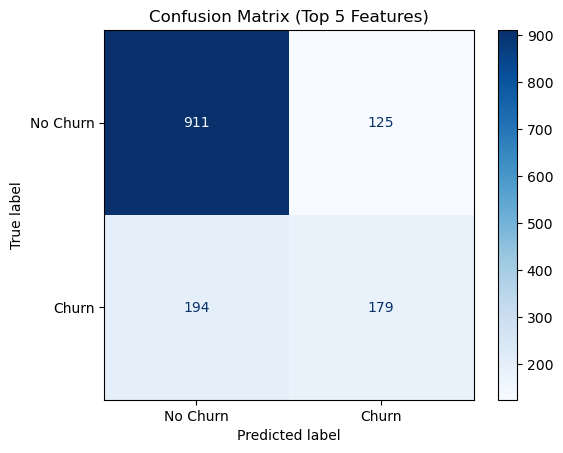

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_top = model_top.predict(X_test_top)
cm = confusion_matrix(y_test_top, y_pred_top)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Top 5 Features)")
plt.show()


In [35]:
print("Top 5 Important Features:", top_features.tolist())


Top 5 Important Features: ['TotalCharges', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']


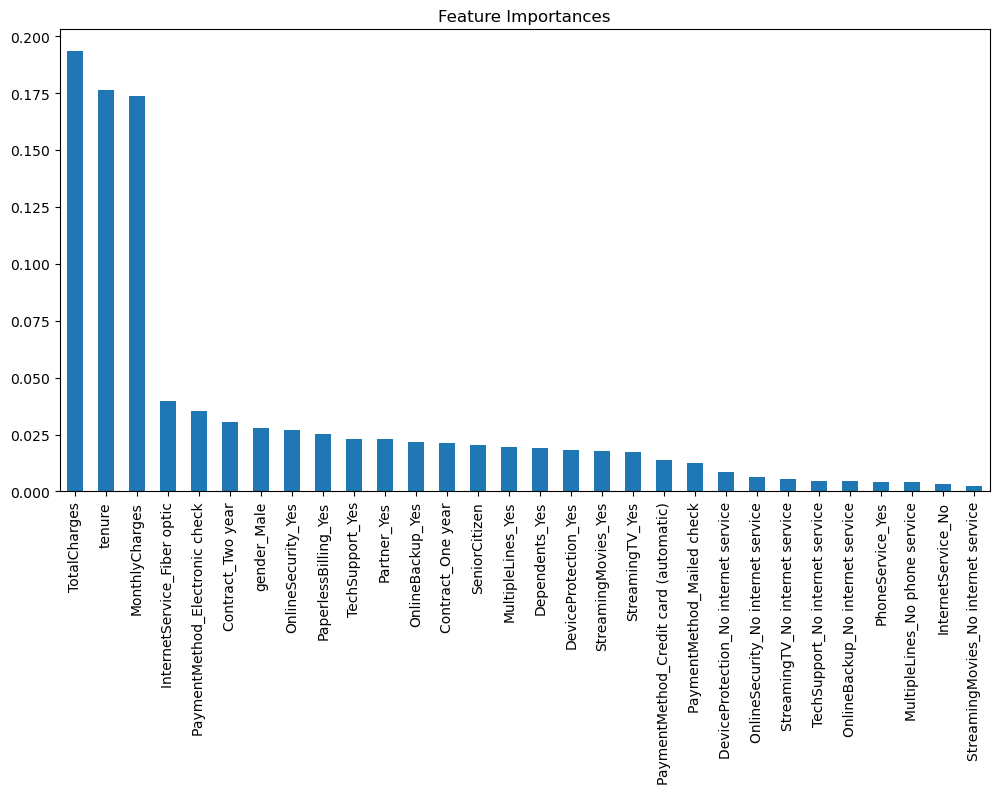

In [36]:
# Get feature importances from the trained model
importances = model_orig.feature_importances_
features = pd.Series(importances, index=X.columns)
features.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Feature Importances")
plt.show()

In [37]:
import joblib

joblib.dump(model_top, "/Users/user/Documents/Jupyter_Lesson/projects/ml_projects/telco_churn/churn_model.pkl")
joblib.dump(top_features.tolist(), "/Users/user/Documents/Jupyter_Lesson/projects/ml_projects/telco_churn/top_features.pkl")  # Save the feature list too


['/Users/user/Documents/Jupyter_Lesson/projects/ml_projects/telco_churn/top_features.pkl']